In [1]:
%load_ext autoreload
%autoreload 2
import sys 
sys.path.append('src/')

In [2]:
import tomllib as toml
from matplotlib import pyplot as plt

from dasbm.models.vq import VQModel
from dasbm.data import CelebaDataset

# Check model

In [15]:
with open('configs/vqgan.toml', 'rb') as file:
    config = toml.load(file)

In [5]:
vq_model = VQModel(
    config['ddconfig'], 
    config['model']['n_embed'],
    config['model']['embed_dim'],
    ckpt_path='/trinity/home/g.ksenofontov/Projects/taming-transformers/logs/2024-12-26T16-45-26_custom_vqgan/checkpoints/last.ckpt'
).cuda()

making attention of type 'vanilla' with 512 in_channels
making attention of type 'vanilla' with 512 in_channels
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels
making attention of type 'vanilla' with 512 in_channels
making attention of type 'vanilla' with 512 in_channels
making attention of type 'vanilla' with 512 in_channels


/beegfs/home/g.ksenofontov/Projects/dasbm/src/dasbm/models/vq.py:571: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sd = torch.load(path, map_location="cpu")["state_dict"]


Restored from /trinity/home/g.ksenofontov/Projects/taming-transformers/logs/2024-12-26T16-45-26_custom_vqgan/checkpoints/last.ckpt


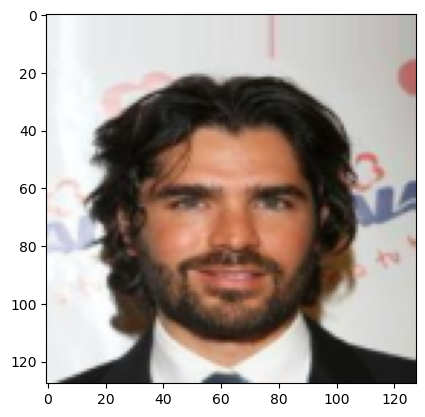

In [24]:
dataset = CelebaDataset('male', './data/celeba', train=False)
sample = dataset[0].unsqueeze(0).cuda()
plt.imshow(sample.squeeze().permute(1, 2, 0).cpu())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.15381429..1.0056044].


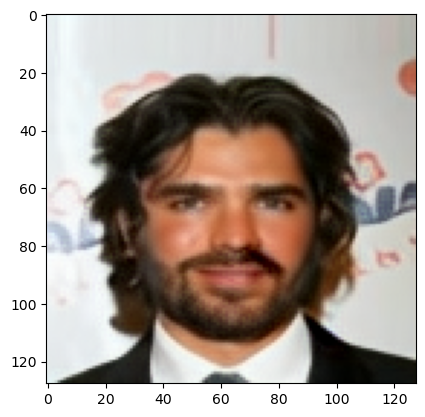

In [25]:
codes = vq_model.encode_code(sample)
decoded = vq_model.decode_code(codes).detach()
plt.imshow(decoded.squeeze().permute(1, 2, 0).cpu())

In [37]:
import torch
print(torch.ones([2, 2]))
torch.matrix_power(torch.ones([2, 2]), n=1)

tensor([[1., 1.],
        [1., 1.]])


tensor([[1., 1.],
        [1., 1.]])